## Problem Statement:
The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

## Dataset Information:
* Loan_ID: A unique loan ID.
* Gender: Either male or female.
* Married: Weather Married(yes) or Not Marttied(No).
* Dependents: Number of family members (0,1,2,3+).
* Education: Applicant Education(Graduate or Undergraduate).
* Self_Employed: Self-employed (Yes/No).
* ApplicantIncome: Applicant income.
* CoapplicantIncome: Additional applicant's monthly salary/income.
* LoanAmount: Loan amount in thousands.
* Loan_Amount_Term: The loan's repayment period (in days).
* Credit_History: Credit history meets guidelines.
* Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
* Loan_Status: Loan approved (Y/N).

### Step 1: Importing Libraries like Numpy, Pandas, Matplotlib, Seaborn and Scikit learn(Sklearn)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

### Step 2: Load the Dataset

In [2]:
df =pd.read_csv(r"C:\Users\gkish\Downloads\archive (7)\train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Step 3: Exploratory Data Analysis
Exploratory Data Analysis (EDA), also known as Data Exploration, it is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In this step, we will perform the below operations:

### 3.1) understanding Your Variables
        3.1.1) Head of the dataset
        3.1.2) The shape of the dataset
        3.1.3) List types of all columns
        3.1.4) Info of the dataset
        3.1.5) Summary of the dataset
        
### 3.2) Data Cleaning
        3.2.1) Checking the Duplicates
        3.2.2) Check the Null values

### 3.1.1) Head of the Dataset

The head() function will tell you the top records in the dataset. By default, python shows you only the top 5 records.

This head(n) function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. By default it will show 5 rows.

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### 3.1.2) The Shape of the dataset
This shape() function gives us the **number of rows** and **columns** of the dataset.

In [5]:
df.shape

(614, 13)

### 3.1.3) List types of all columns 
Using df.dtypes, we get the list of types of all the columns in our dataset.

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### 3.1.4) Info of the dataset
info() is used to check the information about the data and the datatypes of each respective attribute and also gives you the count.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 3.1.5) Summary of the dataset

The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Numerical Features

In [9]:
df.dtypes[df.dtypes!='object'].index

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [10]:
[features  for features in df.dtypes[df.dtypes!='object'].index]

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
num_features = df.dtypes[df.dtypes!='object'].index
num_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [12]:
len(num_features)

5

In [13]:
df[num_features].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Distribution of Categorical Features

In [14]:
cat_features = df.dtypes[df.dtypes == 'object'].index
cat_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
len(cat_features)

8

In [16]:
df[cat_features].describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### Check the Unique Lables

In [17]:
for i in df.columns:
    print("Feature Name = ",i)
    print(df[i].unique(),'\n')
    print(i,'------->',df[i].nunique(),'\n')

Feature Name =  Loan_ID
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP0

### 3.2) Data Cleaning

#### 3.2.1) Drop the Duplicates
check is there any duplicates rows are exist then we should remove from the dataframe.

In [18]:
# check the shape before drop the duplicates
df.shape

(614, 13)

In [19]:
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


You can see there is no duplicates data 

### 3.2.2) Check the Null Values

Using .isnull.sum() function we can see the null values present in the every column in the dataset.

In [20]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
empty_data = df.isnull().sum()
empty_data[empty_data>0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

<AxesSubplot:>

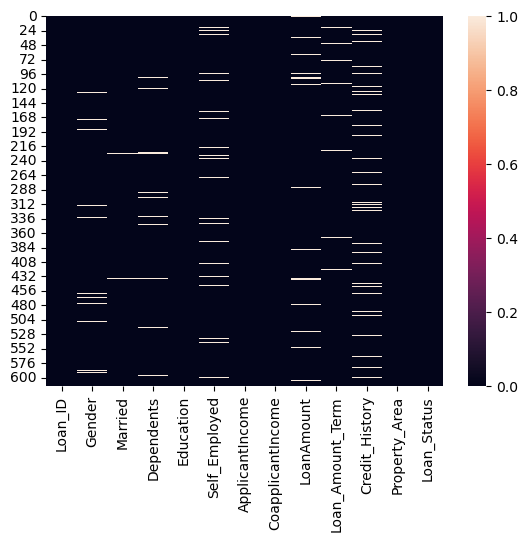

In [22]:
sns.heatmap(df.isnull())

### FILLING NULL VALUES
#### Categorical Variables
In this section, the imputation for categorical variables will be performed using **mode**.

In [23]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

### Numerical Variables
The next section is imputation for numerical variables using mean.

In [24]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [25]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 4) Data Visualization

#### 4.1 Categorical Variable

In [26]:
# Gender

df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

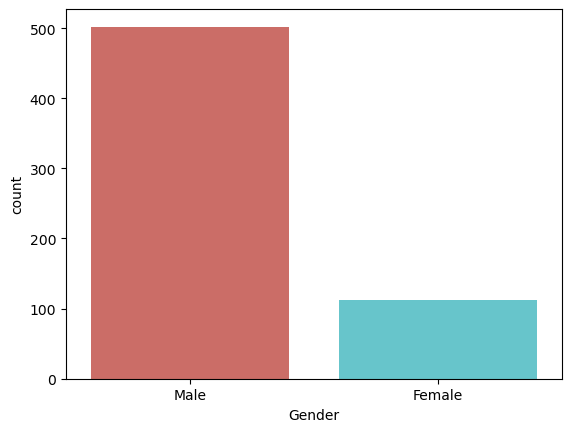

In [27]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [28]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])


print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))


Percentage of Male applicant: 81.76%
Percentage of Female applicant: 18.24%


From the results above, the number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column.

In [29]:
# Married
df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

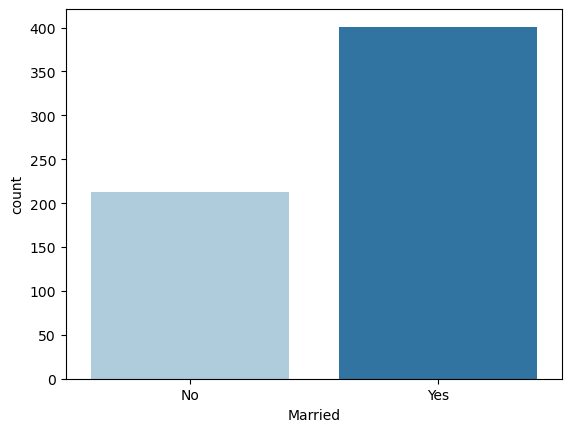

In [30]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

The number of applicants that has been married is higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column.

In [31]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])


print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))

Percentage of married: 65.31%
Percentage of Not married applicant: 34.69%


In [32]:
# Education
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

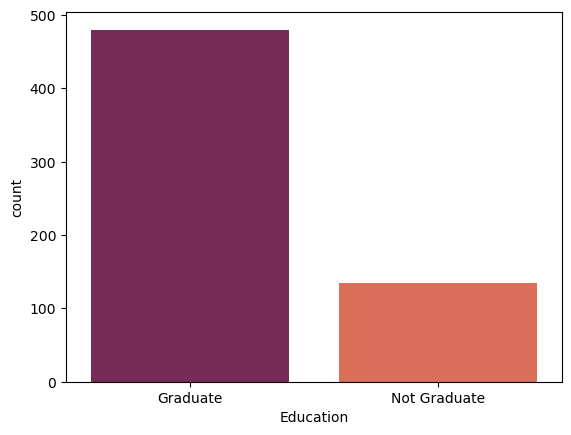

In [33]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [34]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])


print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))


Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%


The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

In [35]:
# Self Employed
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

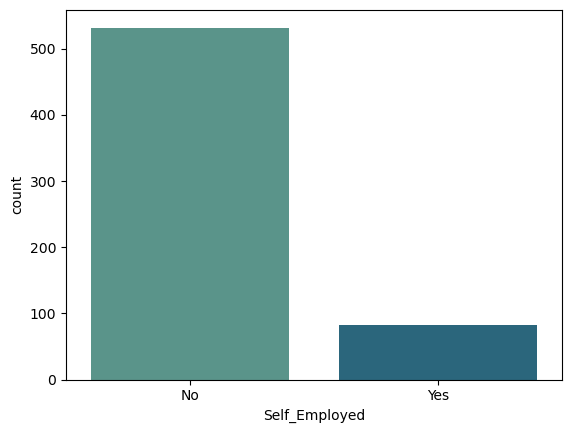

In [36]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [37]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])


print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))


Percentage of Not self employed: 86.64%
Percentage of self employed: 13.36%


The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

In [38]:
# Credit History
df.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

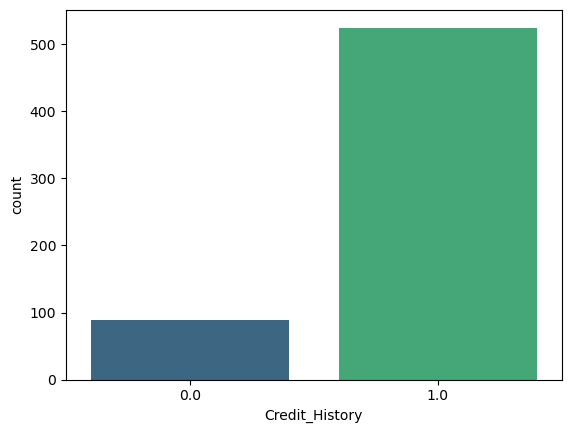

In [39]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [40]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])


print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))

Percentage of Good credit history: 85.50%
Percentage of Bad credit history: 14.50%


The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

In [41]:
# Property Area
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

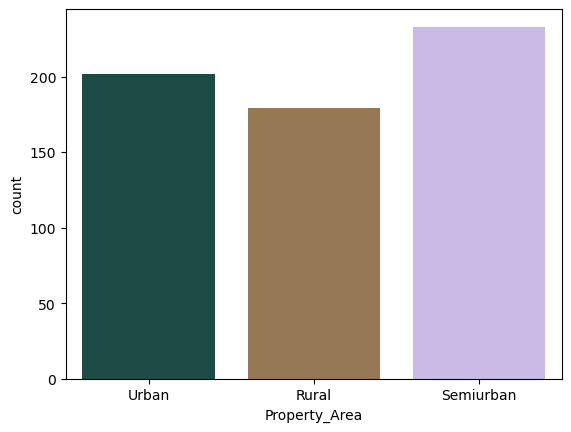

In [42]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [43]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])


print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))


Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%


This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

In [44]:
# Loan Status
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

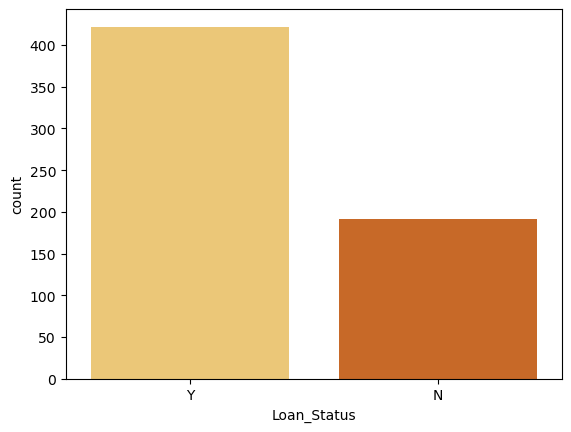

In [45]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [46]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))


Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%


 The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

In [47]:
# Loan Amount Term
df.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

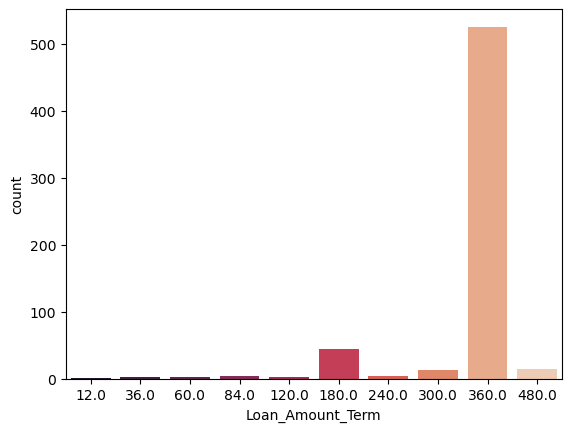

In [48]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [49]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])


print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))


Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 85.67%
Percentage of 480: 2.44%


<AxesSubplot:>

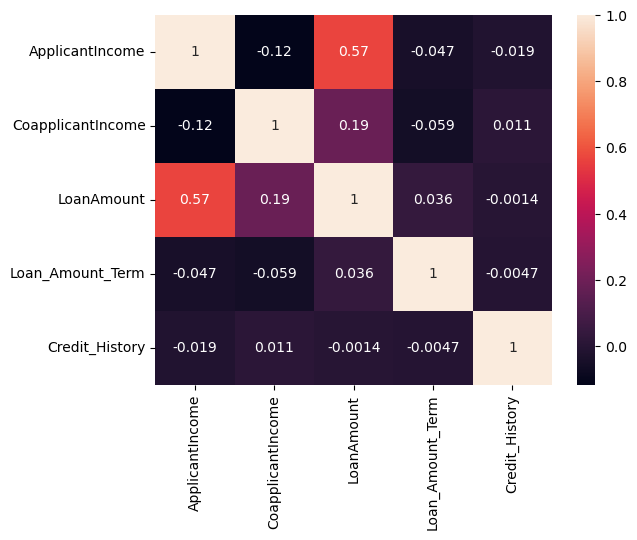

In [50]:
sns.heatmap(df[df.describe().columns.to_list()].corr(),annot = True)

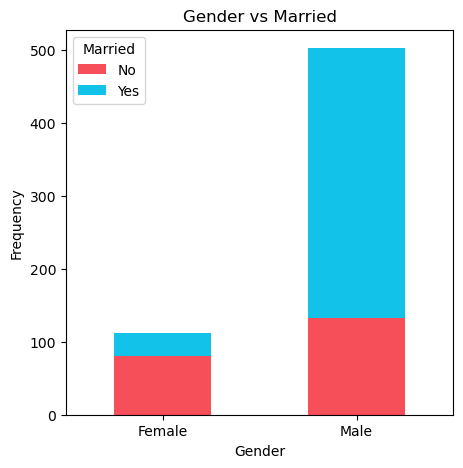

In [51]:
#Gender vs Married
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

 the number of not married male applicants are higher compare to female applicants that had not married.

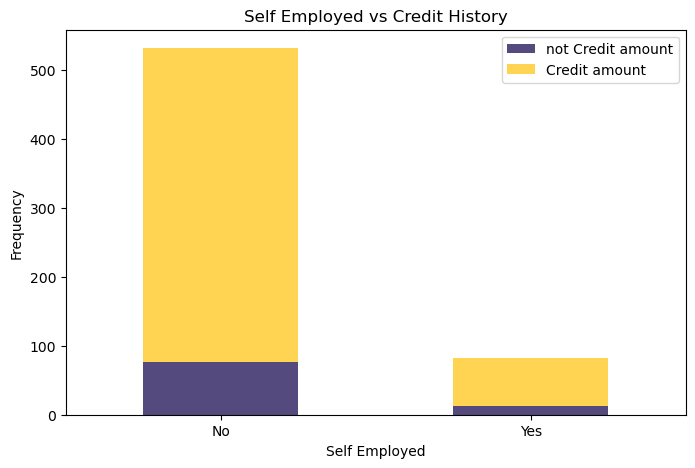

In [52]:
#Self Employed vs Credit History
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(8,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["not Credit amount", "Credit amount"])
plt.xticks(rotation=0)
plt.show()

not self employed more applicants credit amount compared to self employed applicants.

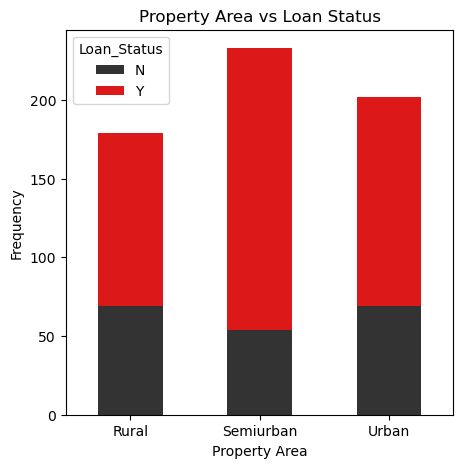

In [53]:
#Property Area vs Loan Status
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

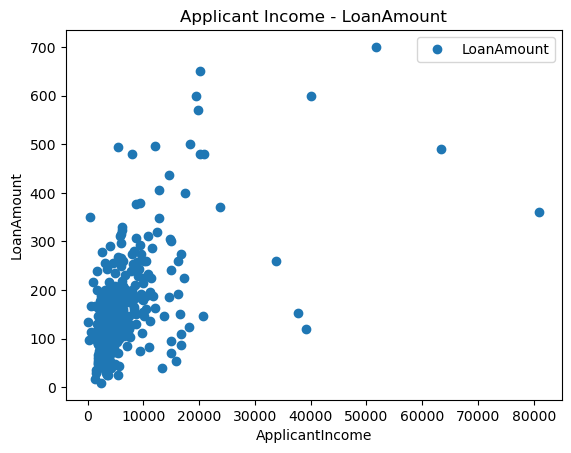

correlation: 0.5656204566820273


In [54]:
df.plot(x='ApplicantIncome', y='LoanAmount', style='o')  
plt.title('Applicant Income - LoanAmount')  
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')  
plt.show()
print('correlation:', df['ApplicantIncome'].corr(df['LoanAmount']))


There is positive correlation between Applicant income and loan amount.

###  Numerical Variable

In [55]:
# Describe Numerical Variable
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,84.037468
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,129.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


In [56]:
# Distribution of Numerical Variable
# I will show the distribution of numerical variable using histogram


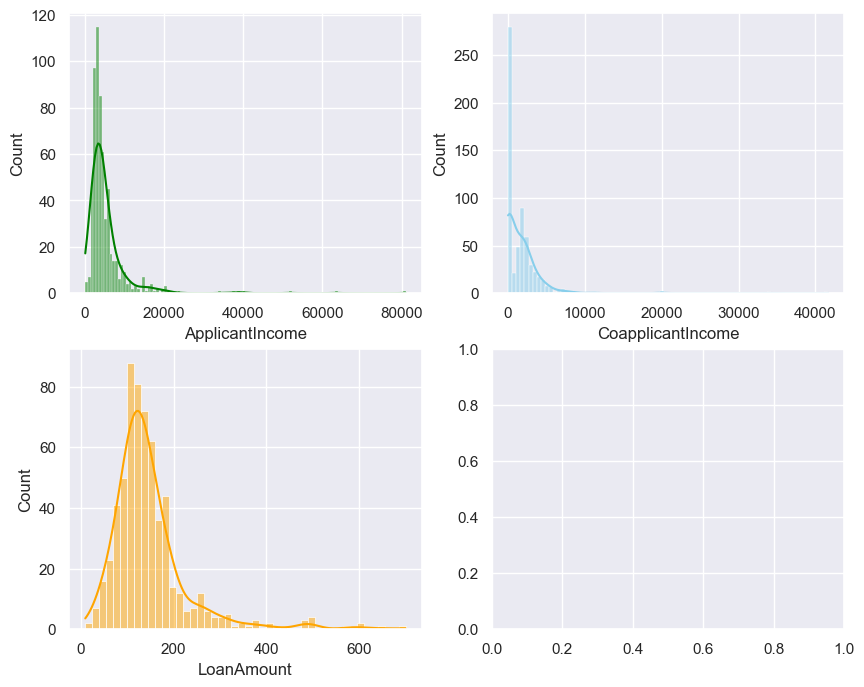

In [57]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

<AxesSubplot:xlabel='ApplicantIncome'>

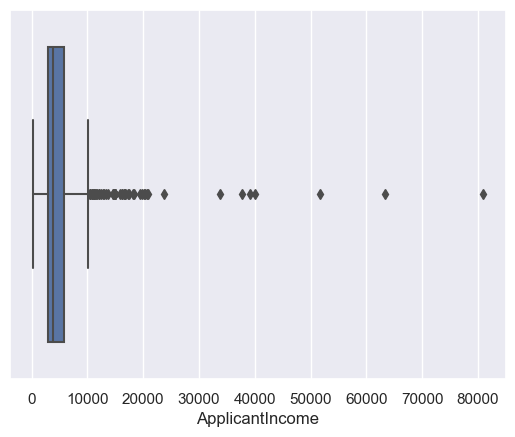

In [58]:
sns.boxplot(df.ApplicantIncome)


In [59]:
#  the outliers will be removed
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


## Skewed Distribution Treatment
* In previous section, it already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed.

* I will use square root transformation to normalized the distribution.

In [60]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

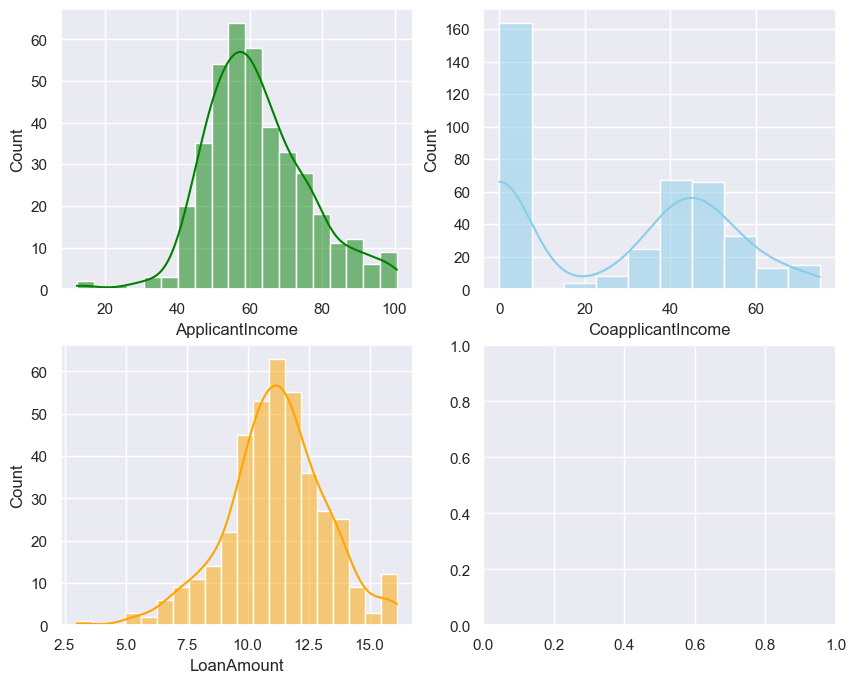

In [61]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

### 5 One-hot encoding
* One-hot encoding is a process of converting categorical variables into binary vectors, which can be easily used as input for machine learning algorithms.

In [62]:
df = pd.get_dummies(df)

###   Features Separating
* Dependent features (Loan_Status) will be seperated from independent features

In [63]:
x = df.iloc[: , :-1].values
y = df.iloc[:, -1].values

### SMOTE Technique
* the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting.


In [64]:
x_res, y_res = SMOTE(random_state=0).fit_resample(x, y)

In [65]:
from collections import Counter
print(f'Before oversampling technique: {Counter(y)}')
print(f'After oversampling technique: {Counter(y_res)}')

Before oversampling technique: Counter({1: 322, 0: 74})
After oversampling technique: Counter({1: 322, 0: 322})


*  the distrubtion of Loan status are now balanced.

### Data Normalization 
* Scales the data to a specific range, often [0, 1].

In [66]:
x = MinMaxScaler().fit_transform(x_res)

### Splitting Data Set
* The data set will be split into 80% train and 20% test.

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state = 0)

### 6 Models

### Logistic Regression

In [69]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(x_train, y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))



              precision    recall  f1-score   support

           0       0.87      0.87      0.87        67
           1       0.85      0.85      0.85        62

    accuracy                           0.86       129
   macro avg       0.86      0.86      0.86       129
weighted avg       0.86      0.86      0.86       129

[[58  9]
 [ 9 53]]
LR accuracy: 86.05%


### K-Nearest Neighbour (KNN)

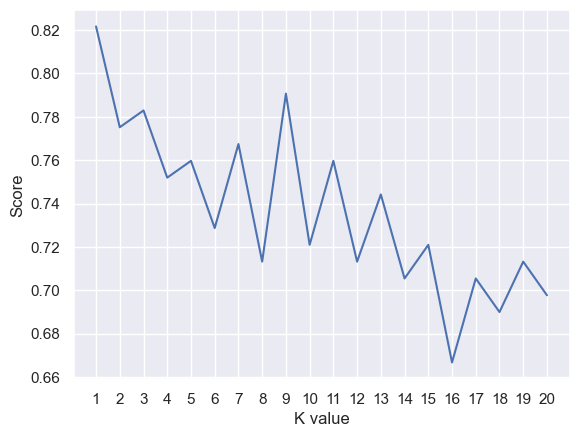

KNN best accuracy: 82.17%


In [70]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(x_train, y_train)
    scoreListknn.append(KNclassifier.score(x_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

### Decision Tree

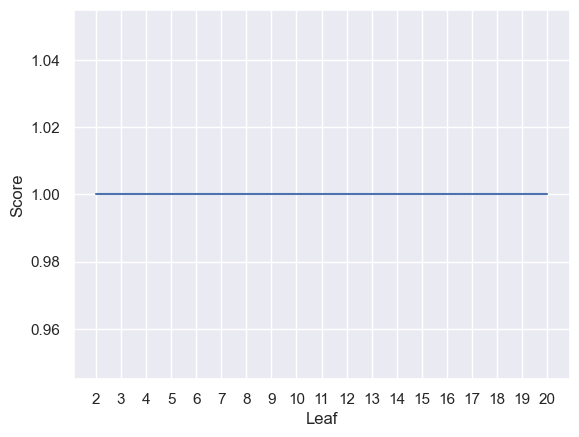

Decision Tree Accuracy: 100.00%


In [73]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(x_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

### Random Forest

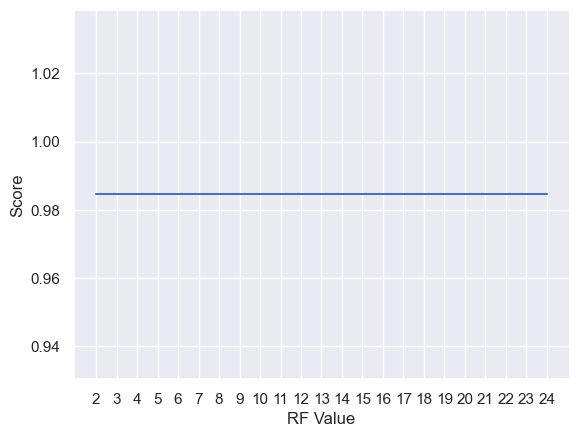

Random Forest Accuracy:  98.45%


In [74]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(x_train, y_train)
    scoreListRF.append(RFclassifier.score(x_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))